In [1]:
%load_ext autoreload
%autoreload 2

from datasets import load_dataset
from boolrank import *

dataset = load_dataset("data", split="train")

data = dataset.train_test_split(test_size=0.2, seed=42)
print(data)

model = DualSiglip2Model()

c:\Users\Simon\miniconda3\envs\RP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['q', 'd'],
        num_rows: 6100
    })
    test: Dataset({
        features: ['q', 'd'],
        num_rows: 1525
    })
})


You are using a model of type siglip_text_model to instantiate a model of type siglip2_text_model. This is not supported for all configurations of models and can yield errors.


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./siglip2/2",
    per_device_train_batch_size=2,
    num_train_epochs=2,
    learning_rate=5e-5,
    weight_decay=0.01,
    logging_steps=200,
    save_steps=200,
    save_total_limit=2,
    remove_unused_columns=False,
    # max_steps=1000,
    bf16=True,
    optim="adamw_bnb_8bit",
    # torch_compile=True,
    # torch_compile_backend="inductor"
)

def collate_fn(batch):
    d = {
        "in_bool": [ex["q"] for ex in batch],
        "in_text": [ex["d"] for ex in batch],
    }
    return d

trainer = Trainer(
    model,
    training_args,
    train_dataset=data["train"],
    eval_dataset=data["test"],
    data_collator=collate_fn,
)

trainer.train(resume_from_checkpoint=False)

     Top-K | Top-K(perc) |   Recall@K
         1 |       0.00 |       0.02
         2 |       0.00 |       0.04
         4 |       0.00 |       0.08
         8 |       0.01 |       0.13
        16 |       0.01 |       0.22
        32 |       0.02 |       0.35
        64 |       0.04 |       0.51
       128 |       0.08 |       0.67
       256 |       0.17 |       0.86
       512 |       0.34 |       0.95
      1024 |       0.67 |       0.99


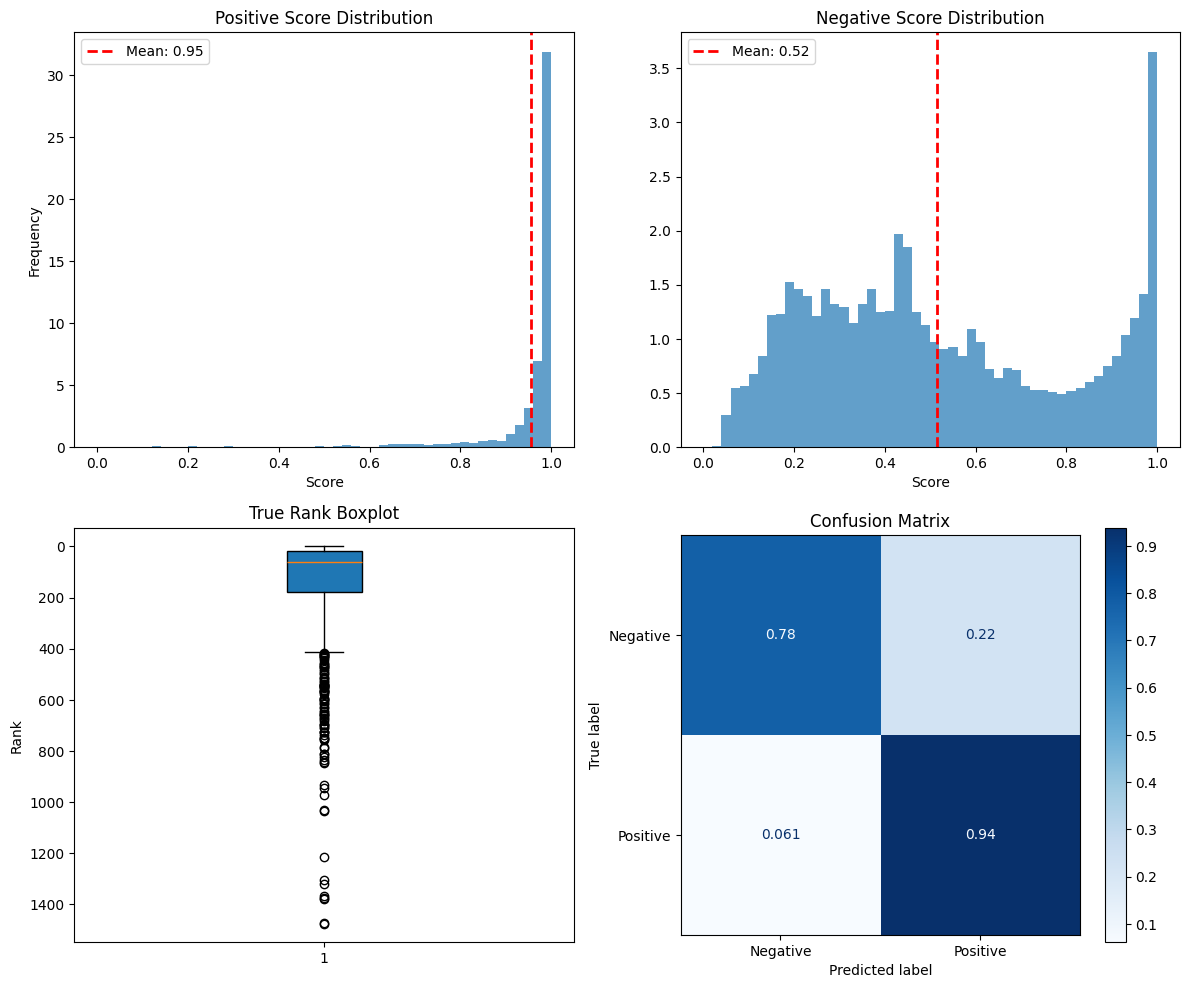

Positive mean: 0.9546 ± 0.1065
Negative mean: 0.5154 ± 0.2806


In [10]:
model = model.load(r"./siglip2/b2-bf-8b/e4/model.safetensors")
amt = 2000
pos_scores = model.evaluate(data["test"]["q"][:amt], data["test"]["d"][:amt], plot=True, threshold=0.8)

     Top-K | Top-K(perc) |   Recall@K
         1 |       0.00 |       0.00
         2 |       0.00 |       0.01
         4 |       0.00 |       0.02
         8 |       0.01 |       0.03
        16 |       0.01 |       0.06
        32 |       0.02 |       0.11
        64 |       0.04 |       0.21
       128 |       0.08 |       0.36
       256 |       0.17 |       0.56
       512 |       0.34 |       0.75
      1024 |       0.67 |       0.98


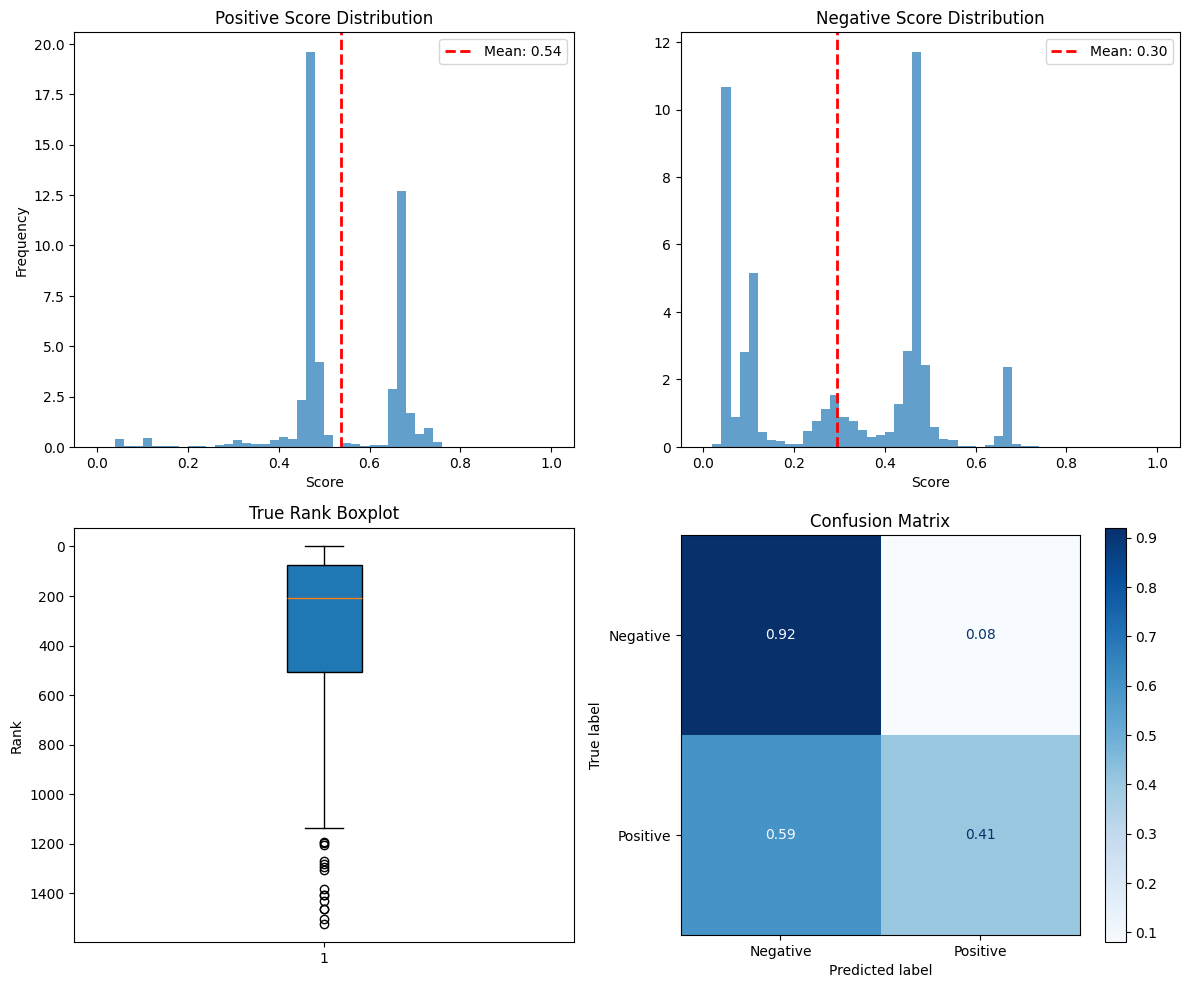

Positive mean: 0.5373 ± 0.1258
Negative mean: 0.2954 ± 0.2024


In [11]:
model = model.load(r"./siglip2/b3-bf-8b/model.safetensors")
pos_scores = model.evaluate(data["test"]["q"][:amt], data["test"]["d"][:amt], plot=True, threshold=0.5)

In [ ]:
import os
import json

base_dir = "tar/2017-TAR/training/extracted_data"
output_file = "data/output.jsonl"

topic_files = [f for f in os.listdir(base_dir) if f.endswith(".topicid")]

with open(output_file, "w", encoding="utf-8") as out:
    for topic_file in topic_files[:1]:
        topic_prefix = topic_file.replace(".topicid", "")
        topicid_path = os.path.join(base_dir, f"{topic_prefix}.topicid")
        title_path = os.path.join(base_dir, f"{topic_prefix}.title")
        pids_path = os.path.join(base_dir, f"{topic_prefix}.pids")

        with open(title_path, encoding="utf-8") as f:
            query = f.read().strip()
            print(query)

        with open(pids_path, encoding="utf-8") as f:
            docs = f.readlines()
            print(docs)

        for doc in docs:
            text = doc.strip()
            if text:
                json.dump({"q": query, "d": text}, out)
                out.write("\n")

CD007394 Galactomannan detection for invasive aspergillosis in immunocompromised patients
['CD007394 18195059\n', 'CD007394 16899843\n', 'CD007394 1682800\n', 'CD007394 6766286\n', 'CD007394 10780890\n', 'CD007394 20445761\n', 'CD007394 17278073\n', 'CD007394 17596809\n', 'CD007394 15762786\n', 'CD007394 8744115\n', 'CD007394 17075330\n', 'CD007394 9325167\n', 'CD007394 12017526\n', 'CD007394 2613343\n', 'CD007394 15943562\n', 'CD007394 18752432\n', 'CD007394 22366166\n', 'CD007394 8114802\n', 'CD007394 9276391\n', 'CD007394 19337880\n', 'CD007394 17472556\n', 'CD007394 7508461\n', 'CD007394 22608703\n', 'CD007394 6183785\n', 'CD007394 22869563\n', 'CD007394 2188321\n', 'CD007394 18319050\n', 'CD007394 11888960\n', 'CD007394 23100916\n', 'CD007394 15626220\n', 'CD007394 20827189\n', 'CD007394 24312781\n', 'CD007394 23700559\n', 'CD007394 20608783\n', 'CD007394 20608781\n', 'CD007394 21708265\n', 'CD007394 9279718\n', 'CD007394 1994786\n', 'CD007394 9193861\n', 'CD007394 23948964\n', 'C